In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set()

In [28]:
raw_data = pd.read_csv("C:/Users/yashd/Downloads/archive (1)/unemployment_data_us.csv")
df = raw_data.copy()
df.head(10)

,Year,Month,Primary_School,Date,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women
0,2010,Jan,15.3,Jan-2010,10.2,8.6,4.9,8.8,16.5,8.3,12.9,10.2,7.9
1,2011,Jan,14.3,Jan-2011,9.5,8.1,4.3,8.1,15.8,6.8,12.3,9.0,7.9
2,2012,Jan,13.0,Jan-2012,8.5,7.1,4.3,7.4,13.6,6.7,10.7,7.7,7.6
3,2013,Jan,12.0,Jan-2013,8.1,6.9,3.8,7.1,13.7,6.4,9.7,7.5,7.2
4,2014,Jan,9.4,Jan-2014,6.5,5.9,3.3,5.7,12.1,4.7,8.3,6.2,5.8
5,2015,Jan,8.3,Jan-2015,5.4,5.2,2.8,4.9,10.3,4.0,6.7,5.3,5.0
6,2016,Jan,7.1,Jan-2016,5.2,4.2,2.5,4.2,8.7,3.6,5.8,4.4,4.5
7,2017,Jan,7.4,Jan-2017,5.2,3.8,2.5,4.2,7.5,3.7,5.8,4.3,4.4
8,2018,Jan,5.4,Jan-2018,4.4,3.4,2.1,3.5,7.5,3.0,5.0,3.8,3.6
9,2019,Jan,5.7,Jan-2019,3.7,3.4,2.4,3.5,6.8,3.1,4.8,3.7,3.6


In [29]:
df_2019 = df[df['Year'] <= 2019]
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 130
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 120 non-null    int64  
 1   Month                120 non-null    object 
 2   Primary_School       120 non-null    float64
 3   Date                 120 non-null    object 
 4   High_School          120 non-null    float64
 5   Associates_Degree    120 non-null    float64
 6   Professional_Degree  120 non-null    float64
 7   White                120 non-null    float64
 8   Black                120 non-null    float64
 9   Asian                120 non-null    float64
 10  Hispanic             120 non-null    float64
 11  Men                  120 non-null    float64
 12  Women                120 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 13.1+ KB


In [30]:
df_2019['Date'] = pd.to_datetime(df_2019.Date)
#df_2019 = df_2019.sort_values(by='Date', ascending=True)
df_2019

C:\Users\yashd\AppData\Local\Temp\ipykernel_1184\461242634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['Date'] = pd.to_datetime(df_2019.Date)


,Year,Month,Primary_School,Date,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women
0,2010,Jan,15.3,2010-01-01,10.2,8.6,4.9,8.8,16.5,8.3,12.9,10.2,7.9
1,2011,Jan,14.3,2011-01-01,9.5,8.1,4.3,8.1,15.8,6.8,12.3,9.0,7.9
2,2012,Jan,13.0,2012-01-01,8.5,7.1,4.3,7.4,13.6,6.7,10.7,7.7,7.6
3,2013,Jan,12.0,2013-01-01,8.1,6.9,3.8,7.1,13.7,6.4,9.7,7.5,7.2
4,2014,Jan,9.4,2014-01-01,6.5,5.9,3.3,5.7,12.1,4.7,8.3,6.2,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,2015,Dec,6.4,2015-12-01,5.6,4.1,2.5,4.4,8.5,4.1,6.2,4.6,4.5
127,2016,Dec,7.5,2016-12-01,5.1,3.8,2.5,4.2,7.9,2.7,5.9,4.4,4.3
128,2017,Dec,6.2,2017-12-01,4.2,3.6,2.2,3.7,6.7,2.5,5.0,3.7,3.7
129,2018,Dec,5.8,2018-12-01,3.8,3.3,2.2,3.4,6.6,3.3,4.4,3.6,3.5


In [36]:
#Creating dummies for month values
month_df = df_2019[['Date','Year','Month']]
month_df = pd.get_dummies(month_df)
date_df = pd.concat([month_df,month_df], axis=0)
date_df

,Date,Year,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,2010-01-01,2010,0,0,0,0,1,0,0,0,0,0,0,0
1,2011-01-01,2011,0,0,0,0,1,0,0,0,0,0,0,0
2,2012-01-01,2012,0,0,0,0,1,0,0,0,0,0,0,0
3,2013-01-01,2013,0,0,0,0,1,0,0,0,0,0,0,0
4,2014-01-01,2014,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,2015-12-01,2015,0,0,1,0,0,0,0,0,0,0,0,0
127,2016-12-01,2016,0,0,1,0,0,0,0,0,0,0,0,0
128,2017-12-01,2017,0,0,1,0,0,0,0,0,0,0,0,0
129,2018-12-01,2018,0,0,1,0,0,0,0,0,0,0,0,0


In [37]:
#Making a gender dataframe for linear regression analysis
gender_data = date_df.copy()

In [38]:
men = np.c_[np.zeros(len(df_2019['Men'])),np.array(df_2019['Men'])]
women = np.c_[np.ones(len(df_2019['Women'])),np.array(df_2019['Women'])]
combined_gender = np.vstack([men,women])
gender_data['Gender'] = combined_gender[:,0]
gender_data['Unemployment Rate'] = combined_gender[:,1]
gender_data

,Date,Year,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Gender,Unemployment Rate
0,2010-01-01,2010,0,0,0,0,1,0,0,0,0,0,0,0,0.0,10.2
1,2011-01-01,2011,0,0,0,0,1,0,0,0,0,0,0,0,0.0,9.0
2,2012-01-01,2012,0,0,0,0,1,0,0,0,0,0,0,0,0.0,7.7
3,2013-01-01,2013,0,0,0,0,1,0,0,0,0,0,0,0,0.0,7.5
4,2014-01-01,2014,0,0,0,0,1,0,0,0,0,0,0,0,0.0,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,2015-12-01,2015,0,0,1,0,0,0,0,0,0,0,0,0,1.0,4.5
127,2016-12-01,2016,0,0,1,0,0,0,0,0,0,0,0,0,1.0,4.3
128,2017-12-01,2017,0,0,1,0,0,0,0,0,0,0,0,0,1.0,3.7
129,2018-12-01,2018,0,0,1,0,0,0,0,0,0,0,0,0,1.0,3.5


In [43]:
gender_data['Gender'] = gender_data['Gender'].astype('object', copy=False)
gender_data = pd.get_dummies(gender_data)
gender_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 130
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               240 non-null    datetime64[ns]
 1   Year               240 non-null    int64         
 2   Month_Apr          240 non-null    uint8         
 3   Month_Aug          240 non-null    uint8         
 4   Month_Dec          240 non-null    uint8         
 5   Month_Feb          240 non-null    uint8         
 6   Month_Jan          240 non-null    uint8         
 7   Month_Jul          240 non-null    uint8         
 8   Month_Jun          240 non-null    uint8         
 9   Month_Mar          240 non-null    uint8         
 10  Month_May          240 non-null    uint8         
 11  Month_Nov          240 non-null    uint8         
 12  Month_Oct          240 non-null    uint8         
 13  Month_Sep          240 non-null    uint8         
 14  Unemployme

c:\users\yashd\appdata\local\programs\python\python38\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


## Creating a model

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(gender_data.drop('Unemployment Rate', axis=1), gender_data['Unemployment Rate'], test_size=0.25, shuffle=True, random_state=99)

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train.drop('Date', axis=1), y_train)
print(f"Score of the model: {model.score(x_train.drop('Date', axis=1), y_train) * 100}")

Score of the model: 95.10524438756835


## Testing the model

In [61]:
y_test.shape

(60,)

In [63]:
test_df = pd.concat([x_test, y_test], axis=1)

Date                 0
Year                 0
Month_Apr            0
Month_Aug            0
Month_Dec            0
Month_Feb            0
Month_Jan            0
Month_Jul            0
Month_Jun            0
Month_Mar            0
Month_May            0
Month_Nov            0
Month_Oct            0
Month_Sep            0
Gender_0.0           0
Gender_1.0           0
Unemployment Rate    0
dtype: int64

In [64]:
test_df['Predicted Rate'] = model.predict(x_test.drop('Date', axis=1))

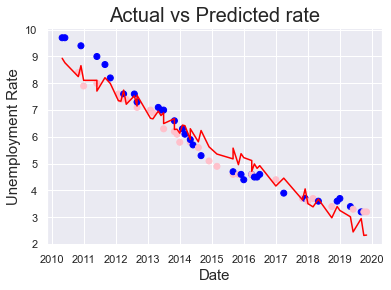

In [79]:
test_df = test_df.sort_values(by='Date', ascending=True)
sex_df = test_df[['Gender_0.0','Gender_1.0']]
sex_df = sex_df.idxmax(axis=1)
test_df['Sex'] = sex_df.map({'Gender_0.0': 'blue', 'Gender_1.0': 'pink'})
plt.scatter(test_df['Date'], test_df['Unemployment Rate'], c=test_df['Sex'])
plt.plot(test_df['Date'], test_df['Predicted Rate'], color = 'red')
plt.title("Actual vs Predicted rate", fontsize = 20)
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Unemployment Rate", fontsize = 15)
plt.show()

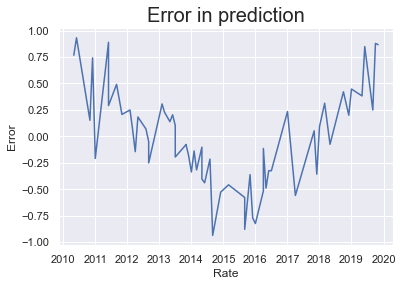

In [82]:
plt.plot(test_df['Date'], test_df['Unemployment Rate'] - test_df['Predicted Rate'])
plt.title("Error in prediction", fontsize=20)
plt.xlabel('Rate')
plt.ylabel('Error')
plt.show()